<a href="https://colab.research.google.com/github/LouisCornellia/Data-Analytics/blob/main/Tourism_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk mengupload file
import os

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


IMPORT DATA

In [ ]:
package = pd.read_csv('/content/drive/MyDrive/Database/package_tourism.csv')
id = pd.read_csv('/content/drive/MyDrive/Database/tourism_with_id.csv')
rating = pd.read_csv('/content/drive/MyDrive/Database/tourism_rating.csv')
user = pd.read_csv('/content/drive/MyDrive/Database/user.csv')


In [ ]:
id = id.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [ ]:
id.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [ ]:
id.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662


In [ ]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


Text(0, 0.5, 'Jumlah Rating')

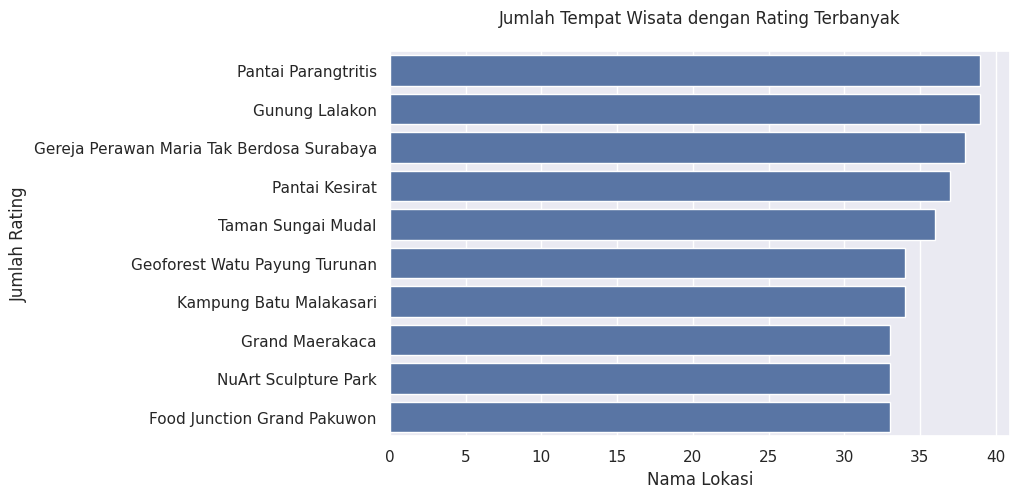

In [ ]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, id[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')


plt.figure(figsize=(8,5))
sns.barplot(x='Place_Id_x', y='Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.xlabel('Nama Lokasi')
plt.ylabel('Jumlah Rating')

<function matplotlib.pyplot.show(close=None, block=None)>

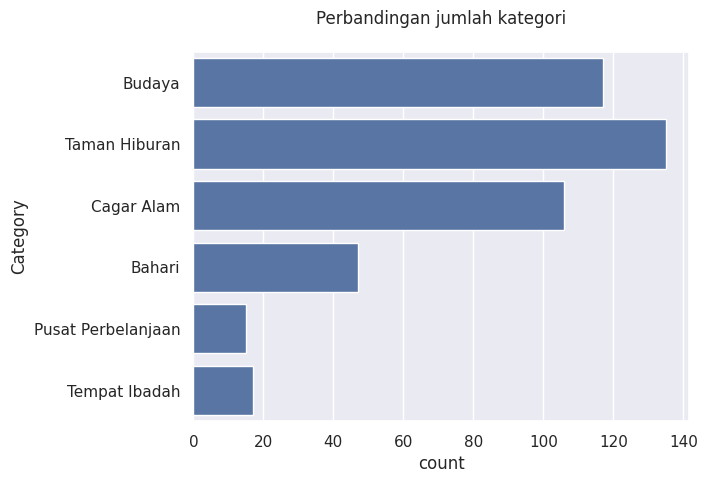

In [ ]:
sns.countplot(y='Category', data = id)
plt.title('Perbandingan jumlah kategori', pad=20)
plt.show

In [ ]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
 7   Coordinate   437 non-null    object 
 8   Lat          437 non-null    float64
 9   Long         437 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 34.3+ KB


In [ ]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


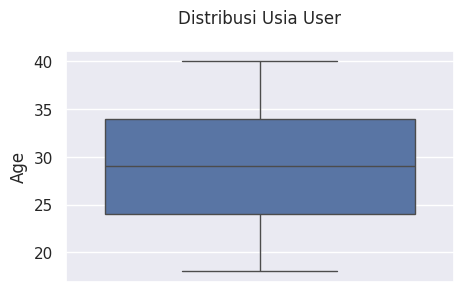

In [ ]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

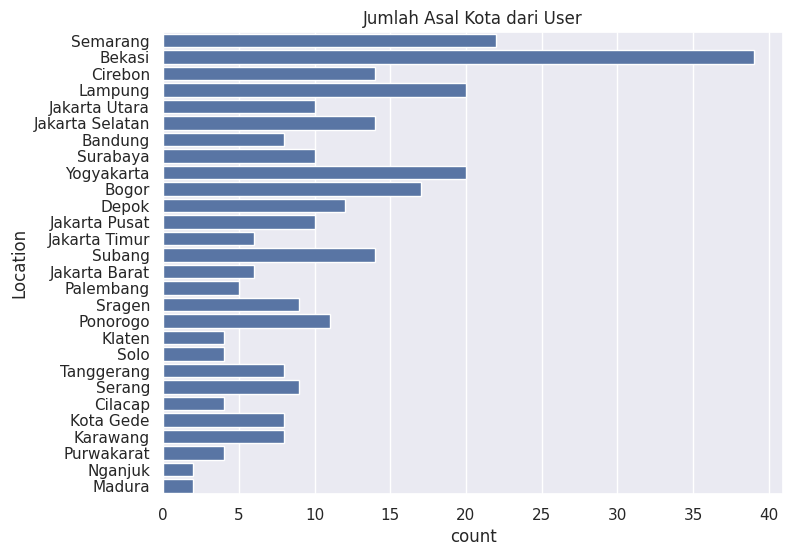

In [ ]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

**ENCODING**

In [ ]:
#membuat salinan data rating

df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
#membuat fungsi untuk melakukan encoding

def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val


In [ ]:
#encoding dan mapping kolom user

user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [ ]:
#encoding dan mapping kolom place

place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [ ]:
#melihat gambaran data untuk permodelan

# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
# Membagi data train dan test
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)

    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
#Inisialisasi Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.7011 - root_mean_squared_error: 0.3482 - val_loss: 0.6955 - val_root_mean_squared_error: 0.3572
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6976 - root_mean_squared_error: 0.3457 - val_loss: 0.6939 - val_root_mean_squared_error: 0.3561
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6942 - root_mean_squared_error: 0.3433 - val_loss: 0.6935 - val_root_mean_squared_error: 0.3558
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6939 - root_mean_squared_error: 0.3431 - val_loss: 0.6934 - val_root_mean_squared_error: 0.3557
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6939 - root_mean_squared_error: 0.3431 - val_loss: 0.6934 - val_root_mean_squared_error: 0.3558
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6922 - root_mean_squared_error: 0.3419 - val_loss: 0.6935 

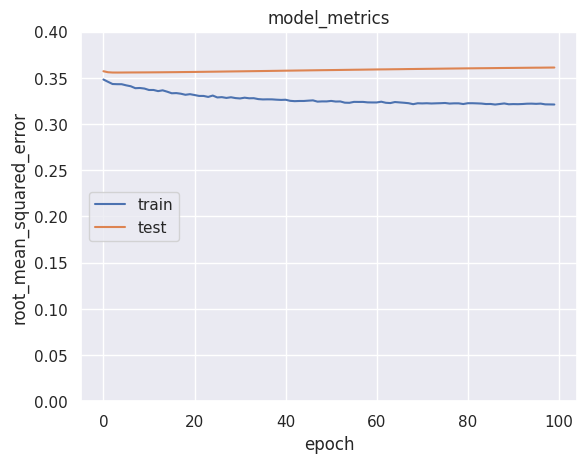

In [ ]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

In [ ]:
# Menyiapkan dataframe
place_df = id[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

In [ ]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]
print(place_visited_by_user)

      User_Id  Place_Id  Place_Ratings
7523      227       158              3
7524      227       198              3
7525      227       339              4
7526      227       118              2
7527      227       423              1
7528      227       113              1
7529      227       176              4
7530      227        72              1
7531      227        74              5
7532      227       280              1
7533      227       219              2
7534      227        62              3
7535      227        64              3
7536      227       295              5
7537      227        97              4
7538      227       427              1
7539      227       211              3
7540      227       289              3
7541      227        97              4
7542      227       250              2
7543      227       225              1
7544      227       115              4
7545      227       175              4
7546      227       104              2
7547      227       234  

In [ ]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(set(place_not_visited).intersection(set(place_to_place_encoded.keys())))

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)
print(place_not_visited)

[[285], [89], [218], [435], [250], [110], [434], [220], [197], [157], [94], [21], [277], [56], [52], [278], [7], [24], [325], [32], [74], [168], [274], [118], [181], [340], [173], [159], [287], [66], [308], [210], [195], [213], [310], [390], [378], [14], [200], [91], [93], [165], [229], [286], [28], [224], [81], [428], [235], [349], [64], [108], [172], [427], [405], [253], [341], [112], [203], [230], [345], [16], [107], [406], [65], [234], [269], [202], [19], [160], [35], [393], [293], [317], [85], [323], [305], [33], [68], [412], [88], [12], [92], [131], [362], [226], [190], [163], [155], [79], [4], [133], [10], [42], [411], [37], [321], [214], [376], [36], [302], [239], [136], [398], [141], [381], [138], [392], [366], [313], [364], [149], [221], [75], [152], [169], [70], [273], [399], [76], [336], [319], [332], [103], [232], [436], [233], [244], [117], [377], [194], [421], [29], [156], [217], [219], [111], [339], [264], [8], [403], [241], [384], [113], [363], [344], [360], [243], [17

In [ ]:
# Mengambil top 7 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 7 place recommendation')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

13/13 [==============================] - 0s 2ms/step
Daftar rekomendasi untuk: User 227

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Monumen Nasional : Budaya
Kota Tua : Budaya
Alun Alun Selatan Yogyakarta : Taman Hiburan
Museum Barli : Budaya
Museum Nike Ardilla : Budaya

------------------------------------------------------------
Top 7 place recommendation
------------------------------------------------------------
1 . Bukit Bintang Yogyakarta 
     Taman Hiburan , Harga Tiket Masuk  25000 , Rating Wisata  4.5 

2 . Desa Wisata Gamplong 
     Taman Hiburan , Harga Tiket Masuk  10000 , Rating Wisata  4.4 

3 . Puncak Gunung Api Purba - Nglanggeran 
     Cagar Alam , Harga Tiket Masuk  10000 , Rating Wisata  4.7 

4 . Pantai Baron 
     Bahari , Harga Tiket Masuk  10000 , Rating Wisata  4.4 

5 . Pintoe Langit Dahromo 
     Cagar Alam , Harga Tiket Masuk  